#### Jiaming Qu {jiaming@ad.unc.edu}

#### Project Description:

The <i>Premier League</i> is a soccer league in England, which is the most famous soccer league in the world with billions of investments and endless audience around hundreds of countries and areas. Among all the teams in the league, the <i>"big 6"</i> teams (Manchester United, Manchester City, Chealsea, Arsenal, Liverpool, and Hotspur) have most fans and attention because they have the strongest players and coaches, as well as a lot of champions and glories.

Most fans of the <i>"big 6"</i> teams are really loyal and claim the team they support is the best in the <i>"big 6"</i>. However, since the games are really intense and all the <i>"big 6"</i> teams are really close to each other sometimes, it is hard to say which team is greatest all time. In this project, I tried to visualize the performance of the <i>"big 6"</i> teams in the past 12 seansons. 

#### Dataset Description:

There are two datasets used in this project: <i>stats.csv</i> and <i>results.csv</i>. Both CSV files contain data from the 2006/2007 season to the 2017/2018 season (12 seasons in total).

<i>results.csv</i> contains 6 columns in total: hometeam, awayteam, hometeam goals, awayteam goals, result('H' for hometeam wins, 'A' for awayteam wins, and 'D' for a draw), and the corresponding season.

<i>stats.csv</i> contains 43 columns, but the columns we are caring about is teams and their rankings in the 12 seansons. Other columns are all about their performances: offense, defense and overall performance. Some of the columns will be used to show how their performances change over time.

#### Packages Used:

ggplot2, dplyr, tidyr, reshape2, ggpubr

In [168]:
library(ggplot2)
library(dplyr)
library(tidyr)
library(reshape2)
library(ggpubr)

In [188]:
df_stat <- read.csv('dataset/stats.csv')
df_result <- read.csv('dataset/results.csv')

#### First take a glimpse at the data set.

In [189]:
# All the games played during 2006/07 season to 2017/18 season.
head(df_result)

home_team,away_team,home_goals,away_goals,result,season
Sheffield United,Liverpool,1,1,D,2006-2007
Arsenal,Aston Villa,1,1,D,2006-2007
Everton,Watford,2,1,H,2006-2007
Newcastle United,Wigan Athletic,2,1,H,2006-2007
Portsmouth,Blackburn Rovers,3,0,H,2006-2007
Reading,Middlesbrough,3,2,H,2006-2007


In [171]:
# Detailed statistics for the big 6 during 2006/07 season to 2017/18 season.
head(df_stat)

team,ranking,wins,losses,goals,total_yel_card,total_red_card,total_scoring_att,ontarget_scoring_att,hit_woodwork,⋯,total_cross,corner_taken,touches,big_chance_missed,clearance_off_line,dispossessed,penalty_save,total_high_claim,punches,season
Manchester United,1,28,5,83,60,1,698,256,21,⋯,918,258,25686,NA,1,NA,2,37,25,2006-2007
Chelsea,2,24,3,64,62,4,636,216,14,⋯,897,231,24010,NA,2,NA,1,74,22,2006-2007
Liverpool,3,20,10,57,44,0,668,214,15,⋯,1107,282,24150,NA,1,NA,0,51,27,2006-2007
Arsenal,4,19,8,63,59,3,638,226,19,⋯,873,278,25592,NA,1,NA,0,88,27,2006-2007
Tottenham Hotspur,5,17,12,57,48,3,520,184,6,⋯,796,181,22200,NA,2,NA,0,51,24,2006-2007
Manchester City,14,11,18,29,59,4,454,147,5,⋯,811,198,19378,NA,4,NA,1,64,17,2006-2007


#### Let's see how rankings of the <i>"big 6"</i> changed over the past 12 seansons.

In [173]:
# First extract the data we are going to use and put it into a data frame.
df_ranking <- df_stat %>% select('team','ranking','season')
# This is how the data frame looks like (order by season).
head(df_ranking)

team,ranking,season
Manchester United,1,2006-2007
Chelsea,2,2006-2007
Liverpool,3,2006-2007
Arsenal,4,2006-2007
Tottenham Hotspur,5,2006-2007
Manchester City,14,2006-2007


#### First, let's see how many champions these teams have won in the past 12 seansons.

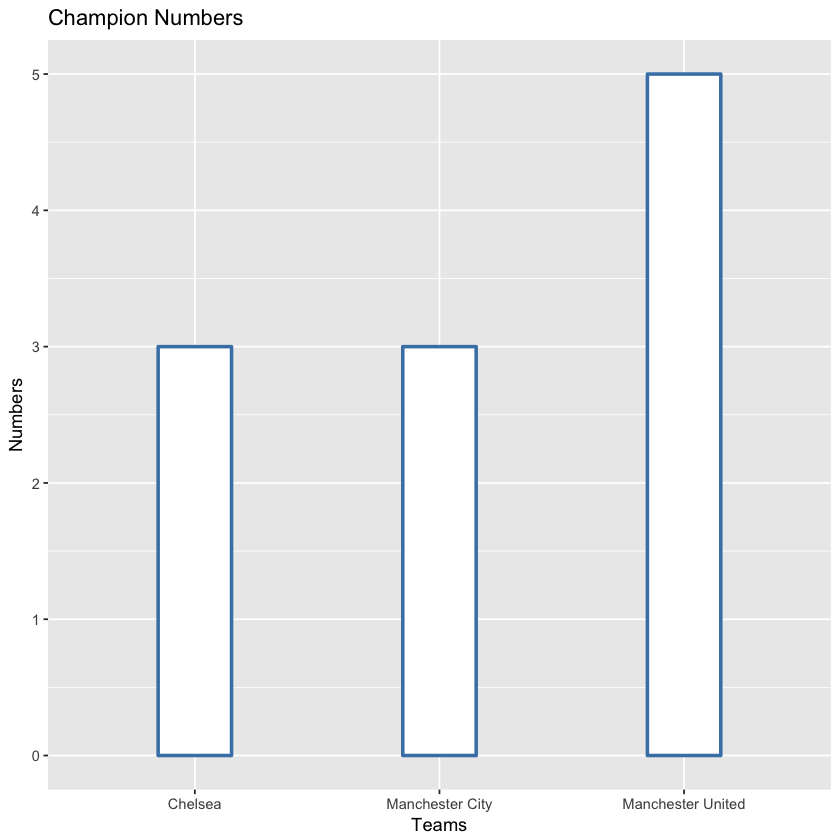

In [145]:
# Filter the data, put into a data frame and visualize. 
df_champions <- filter(df_stat, ranking == '1') %>% count(team)
pl_champions <- ggplot(df_champions,aes(x=team, y=n))+
    geom_bar(stat='identity', fill='white', color='steelblue', size = 1, width=0.3)+
    labs(title ="Champion Numbers", x = "Teams", y = "Numbers")
print(pl_champions)
# You may find that there are 11 champions they have won in total.
# Yes, the champion for the 15/16 season is Leicester City!

11 champions in the past 12 seasons were got by teams from the <i>"big 6"</i>: Manchester United had 5, Manchester City and Chelsea both had 3.

#### Then, let's see how rankings of these teams change over the past 12 seasons.

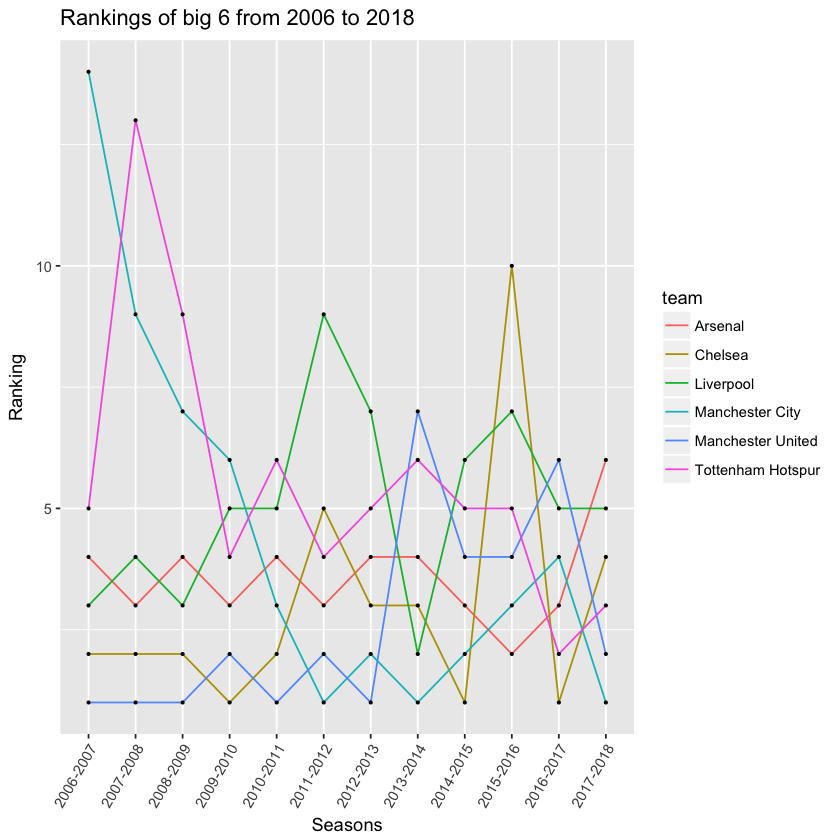

In [174]:
pl_ranking <- ggplot(df_ranking,aes(x=season,y=ranking,group=team))+
    geom_line(aes(color=team))+ geom_point(size = 0.5)+
    theme(axis.text.x = element_text(angle = 60, hjust = 1))+
    labs(title ="Rankings of big 6 from 2006 to 2018", x = "Seasons", y = "Ranking") 
print(pl_ranking)

#### Oops! It seems a little bit messy, so let's try to use the facet to sperate by team.

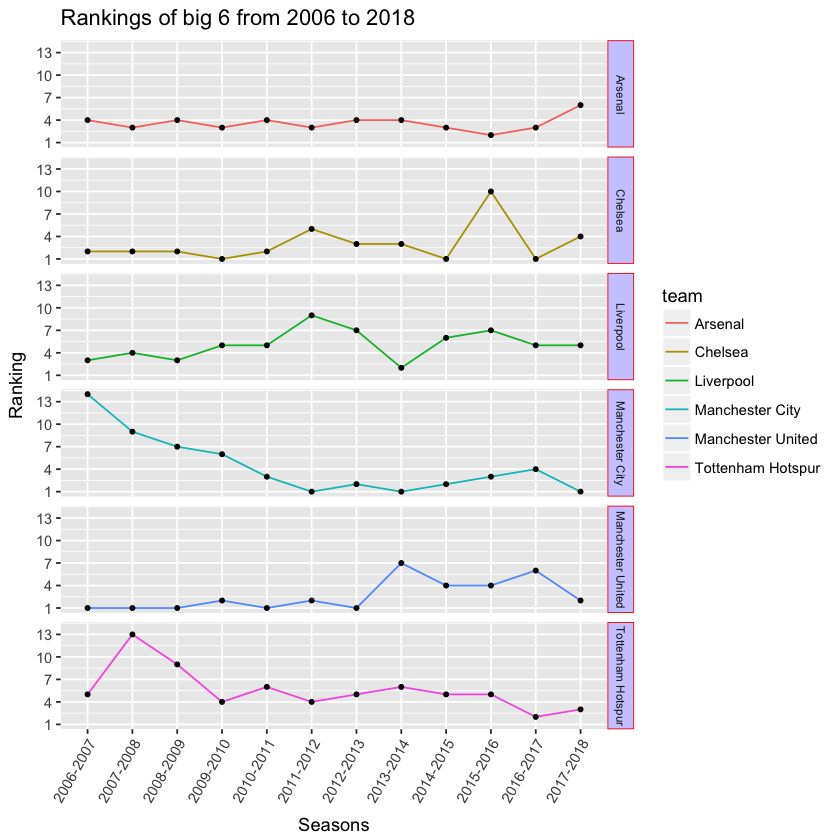

In [175]:
pl_ranking_new <- ggplot(df_ranking,aes(x=season,y=ranking,group=team))+
    geom_line(aes(color=team))+ geom_point(size = 1)+
    theme(axis.text.x = element_text(angle = 60, hjust = 1))+
    scale_y_continuous(breaks = seq(1, 14, by = 3))+
    facet_grid(team ~ .)+
    theme(strip.text.y = element_text(size=7),
          strip.background = element_rect(colour="red", fill="#CCCCFF"))+
    labs(title ="Rankings of big 6 from 2006 to 2018", x = "Seasons", y = "Ranking")
print(pl_ranking_new)

<b>(Attention: the y-axis is ranking, so the lower, the better!)</b><br>
As is shown in the graph, Manchester United was very strong during 2006 to 2012, but it never had the champion again since then, which was because their legend coach, Alexander Ferguson, retired. But Manchester City, the club also from Manchester, became better and better, which was because the increasing investment. Arsenal was relatively stable during these tweleve years, but the never had the champion. Chelsea, Liverpool and Hotspur all had some kind of going up or down, but Chelsea was much better than the other two clubs.

#### Next, let's see how many goals each team made over the past 12 seasons.

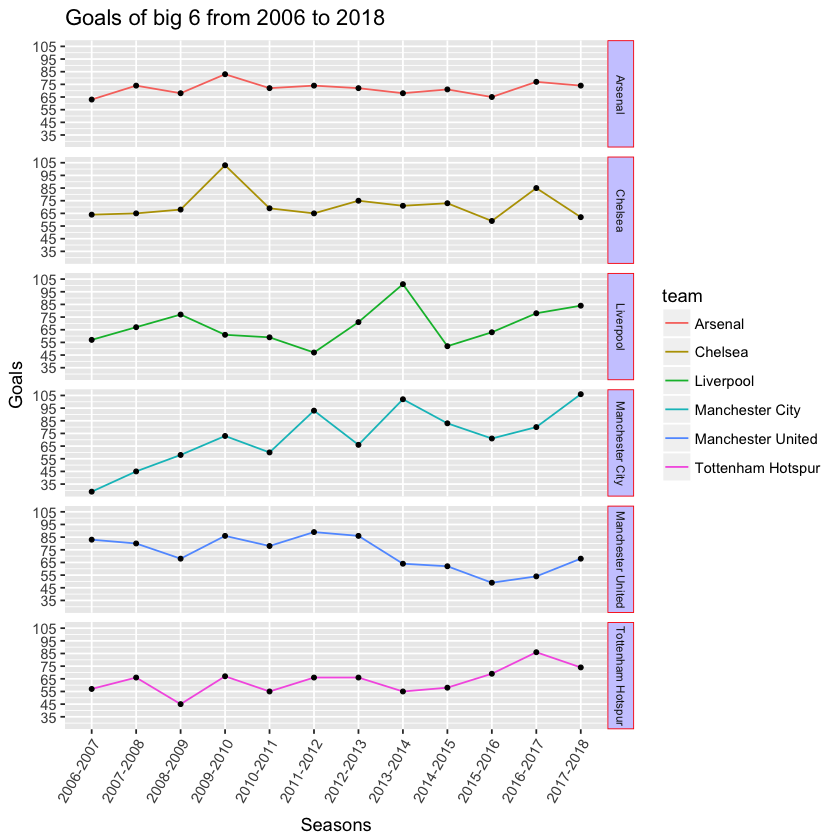

In [148]:
df_goals <- df_stat %>% select('team','goals','season')
pl_goals <- ggplot(df_goals,aes(x=season,y=goals,group=team))+
    geom_line(aes(color=team))+ geom_point(size = 1)+
    theme(axis.text.x = element_text(angle = 60, hjust = 1))+
    scale_y_continuous(breaks = seq(25, 110, by = 10))+
    facet_grid(team ~ .)+
    theme(strip.text.y = element_text(size=7),
          strip.background = element_rect(colour="red", fill="#CCCCFF"))+
    labs(title ="Goals of big 6 from 2006 to 2018", x = "Seasons", y = "Goals")
print(pl_goals)

As is shown in the graph, Arsenal was still stable in the goals, and Manchester City had an obvious improvement. Manchester had a decreased trend since 2012. The other three clubs also underwent some kind of unstable changes.

#### Question: Better at home games or better at away games?

Some teams are good at playing at home, but some teams are good at playing away. Let's see how many wins these teams made at home or away in the past 12 seasons.

In [149]:
# First create a new data frame with 5 columns
df_wins <- data.frame(matrix(ncol = 5, nrow = 0))
x <- c("team","homewins","awaywins","draw","season")
colnames(df_wins) <- x
df_wins

team,homewins,awaywins,draw,season


In [150]:
head(df_result)

home_team,away_team,home_goals,away_goals,result,season
Sheffield United,Liverpool,1,1,D,2006-2007
Arsenal,Aston Villa,1,1,D,2006-2007
Everton,Watford,2,1,H,2006-2007
Newcastle United,Wigan Athletic,2,1,H,2006-2007
Portsmouth,Blackburn Rovers,3,0,H,2006-2007
Reading,Middlesbrough,3,2,H,2006-2007


In [151]:
# create a function to calculate the wins at home/away, and draws
calculate_wins <- function(df, t, s){
  h <- as.numeric(filter(df, home_team == t , result == 'H' , season == s) %>% count())
  a <- as.numeric(filter(df, away_team == t , result == 'A' , season == s) %>% count())
  d <- as.numeric(filter(df, home_team == t , result == 'D' , season == s) %>% count())
  record <- data.frame(team = t, homewins = h, awaywins = a, draw = d, season = s)
  return(record)
}

In [152]:
# use a for loop to calculate for all team and all seasons
teams <- c('Manchester United', 'Manchester City', 'Chelsea', 
           'Arsenal', 'Liverpool', 'Tottenham Hotspur')
seasons <- c('2006-2007','2007-2008','2008-2009','2009-2010','2010-2011',
             '2011-2012','2012-2013','2013-2014','2014-2015','2015-2016',
             '2016-2017','2017-2018')

for (team in teams){
    for (season in seasons){    
    df_wins <- rbind(df_wins,calculate_wins(df_result, team, season))
    }
}    

In [153]:
head(df_wins)

team,homewins,awaywins,draw,season
Manchester United,15,13,2,2006-2007
Manchester United,17,10,1,2007-2008
Manchester United,16,12,2,2008-2009
Manchester United,16,11,1,2009-2010
Manchester United,18,5,1,2010-2011
Manchester United,15,13,2,2011-2012


In [154]:
# There should be 72 rows (6*12) and 5 columns.
dim(df_wins)

[1] 72  5

Until now, we have created a new data frame which contains the number of home wins, away wins and draws for each team. 
The next step is to visualize this data. Let's plot for each team.

In [155]:
# Manchester United
df_wins_mu <- filter(df_wins, team == 'Manchester United')
dfm_wins_mu <- melt(df_wins_mu[,c('season','homewins','awaywins','draw')],id.vars = 1)
x <- c("season","type","value")
colnames(dfm_wins_mu) <- x

In [156]:
pl_mu <- ggplot(dfm_wins_mu,aes(x=season,y=value))+
    geom_bar(aes(fill = type),stat = "identity", position = "fill")+
    theme(text = element_text(size=8),
          axis.text.x = element_text(angle = 60, hjust = 1))+
    labs(title ="Manchester United performances", x = "Seasons", y = "Percentage")

In [157]:
# Manchester City
df_wins_mc <- filter(df_wins, team == 'Manchester City')
dfm_wins_mc <- melt(df_wins_mc[,c('season','homewins','awaywins','draw')],id.vars = 1)
x <- c("season","type","value")
colnames(dfm_wins_mc) <- x

In [158]:
pl_mc <- ggplot(dfm_wins_mc,aes(x=season,y=value))+
    geom_bar(aes(fill = type),stat = "identity", position = "fill")+
    theme(text = element_text(size=8),
          axis.text.x = element_text(angle = 60, hjust = 1))+
    labs(title ="Manchester City performances", x = "Seasons", y = "Percentage")

In [159]:
# Liverpool
df_wins_lp <- filter(df_wins, team == 'Liverpool')
dfm_wins_lp <- melt(df_wins_lp[,c('season','homewins','awaywins','draw')],id.vars = 1)
x <- c("season","type","value")
colnames(dfm_wins_lp) <- x

In [160]:
pl_lp <- ggplot(dfm_wins_lp,aes(x=season,y=value))+
    geom_bar(aes(fill = type),stat = "identity", position = "fill")+
    theme(text = element_text(size=8),
          axis.text.x = element_text(angle = 60, hjust = 1))+
    labs(title ="Liverpool performances", x = "Seasons", y = "Percentage")

In [161]:
# Arsenal
df_wins_ar <- filter(df_wins, team == 'Arsenal')
dfm_wins_ar <- melt(df_wins_ar[,c('season','homewins','awaywins','draw')],id.vars = 1)
x <- c("season","type","value")
colnames(dfm_wins_ar) <- x

In [162]:
pl_ar <- ggplot(dfm_wins_ar,aes(x=season,y=value))+
    geom_bar(aes(fill = type),stat = "identity", position = "fill")+
    theme(text = element_text(size=8),
          axis.text.x = element_text(angle = 60, hjust = 1))+
    labs(title ="Arsenal performances", x = "Seasons", y = "Percentage")

In [163]:
# Chelsea
df_wins_ch <- filter(df_wins, team == 'Chelsea')
dfm_wins_ch <- melt(df_wins_ch[,c('season','homewins','awaywins','draw')],id.vars = 1)
x <- c("season","type","value")
colnames(dfm_wins_ch) <- x

In [164]:
pl_ch <- ggplot(dfm_wins_ch,aes(x=season,y=value))+
    geom_bar(aes(fill = type),stat = "identity", position = "fill")+
    theme(text = element_text(size=8),
          axis.text.x = element_text(angle = 60, hjust = 1))+
    labs(title ="Chelsea performances", x = "Seasons", y = "Percentage")

In [165]:
# Hotspur
df_wins_hs <- filter(df_wins, team == 'Tottenham Hotspur')
dfm_wins_hs <- melt(df_wins_hs[,c('season','homewins','awaywins','draw')],id.vars = 1)
x <- c("season","type","value")
colnames(dfm_wins_hs) <- x

In [166]:
pl_hs <- ggplot(dfm_wins_hs,aes(x=season,y=value))+
    geom_bar(aes(fill = type),stat = "identity", position = "fill")+
    theme(text = element_text(size=8),
          axis.text.x = element_text(angle = 60, hjust = 1))+
    labs(title ="Hotspur performances", x = "Seasons", y = "Percentage")

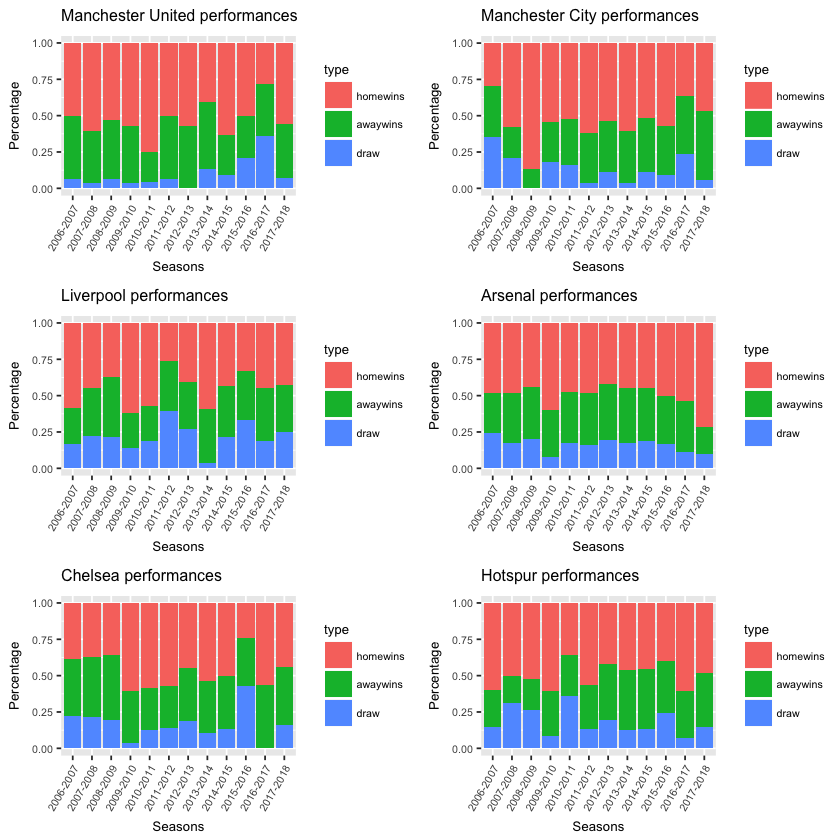

In [167]:
# Mix in to a single graph!
ggarrange(pl_mu, pl_mc, pl_lp, pl_ar, pl_ch, pl_hs, nrow=3, ncol=2)

Take a fast glimpse at the graph, we could say all these teams play same well whether at home or away (and that's why they become super teams in the league!) But wins at home are still slightly more than wins away (maybe it's because they have support from their crazy fans.) Liverpool had most draws among these teams. Draws made by Arsenal was very stable during the past 12 seasons. Manchester United and Manchester City were really good at playing home games. Chelsea and Hotspur had similar wins at home or away.

#### Predicting the ranking?

In the section, let's try to predict the ranking based the data set. To do this, I found the detailed statistics for all the teams in the league during the past 12 seasons.

In [197]:
df_statall <- read.csv('dataset/stats_all.csv')
# make the null value to 0
df_statall[is.na(df_statall)] <- 0
head(df_statall)

team,ranking,wins,losses,goals,total_yel_card,total_red_card,total_scoring_att,ontarget_scoring_att,hit_woodwork,⋯,total_cross,corner_taken,touches,big_chance_missed,clearance_off_line,dispossessed,penalty_save,total_high_claim,punches,season
Manchester United,1,28,5,83,60,1,698,256,21,⋯,918,258,25686,0,1,0,2,37,25,2006-2007
Chelsea,2,24,3,64,62,4,636,216,14,⋯,897,231,24010,0,2,0,1,74,22,2006-2007
Liverpool,3,20,10,57,44,0,668,214,15,⋯,1107,282,24150,0,1,0,0,51,27,2006-2007
Arsenal,4,19,8,63,59,3,638,226,19,⋯,873,278,25592,0,1,0,0,88,27,2006-2007
Tottenham Hotspur,5,17,12,57,48,3,520,184,6,⋯,796,181,22200,0,2,0,0,51,24,2006-2007
Bolton Wanderers,6,16,14,47,84,4,404,120,7,⋯,942,217,18932,0,6,0,2,44,21,2006-2007


#### Step 1. Create the training (development) and test (validation) data samples from original data

In [198]:
set.seed(111)
trainingRowIndex <- sample(1:nrow(df_statall), 0.8*nrow(df_statall))
trainingData <- df_statall[trainingRowIndex, ]
testData <- df_statall[-trainingRowIndex, ]

#### Step 2. Fit the model

In [200]:
m1 <- lm(ranking ~. -team-season, data=trainingData)
summary(m1)


Call:
lm(formula = ranking ~ . - team - season, data = trainingData)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.5871 -1.2094  0.1445  1.2686  4.4623 

Coefficients:
                       Estimate Std. Error t value Pr(>|t|)    
(Intercept)          28.5976076  5.7545029   4.970  1.8e-06 ***
wins                 -0.9972828  0.0822764 -12.121  < 2e-16 ***
losses               -0.1252293  0.0765887  -1.635  0.10411    
goals                -0.1061936  0.8551435  -0.124  0.90134    
total_yel_card        0.0150964  0.0152771   0.988  0.32465    
total_red_card        0.1316420  0.0790134   1.666  0.09777 .  
total_scoring_att     0.0067791  0.0054089   1.253  0.21203    
ontarget_scoring_att  0.0017693  0.0162520   0.109  0.91345    
hit_woodwork          0.0120350  0.0373772   0.322  0.74791    
att_hd_goal          -0.1094013  0.0494467  -2.213  0.02843 *  
att_pen_goal         -0.0700507  0.0851401  -0.823  0.41194    
att_freekick_goal     0.0723674  0.1240820   0.583  0

#### Step 3. Revise the model

Due to the time limit, I just revised the model by the p-value. I did not check outliers, multicollinearity or other stuff. And the assumption that residuals follow a Gussian distribution is made. The R-squared is good, but it maybe "overfitting". Let's remove some unimportant variables (with p-value > 0.1).

In [202]:
m2 <- lm(ranking ~ wins+losses+total_red_card+att_hd_goal+goal_fastbreak+
         total_offside+clean_sheet+goals_conceded+own_goals+
         corner_taken+big_chance_missed, data=trainingData)
summary(m2)


Call:
lm(formula = ranking ~ wins + losses + total_red_card + att_hd_goal + 
    goal_fastbreak + total_offside + clean_sheet + goals_conceded + 
    own_goals + corner_taken + big_chance_missed, data = trainingData)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.8944 -1.4504  0.0591  1.3143  3.8418 

Coefficients:
                   Estimate Std. Error t value Pr(>|t|)    
(Intercept)       19.234507   2.512740   7.655 1.14e-12 ***
wins              -0.775830   0.056046 -13.843  < 2e-16 ***
losses            -0.036853   0.066030  -0.558  0.57745    
total_red_card     0.060373   0.073481   0.822  0.41239    
att_hd_goal       -0.054464   0.041434  -1.314  0.19036    
goal_fastbreak    -0.069766   0.068479  -1.019  0.30967    
total_offside     -0.009221   0.006803  -1.355  0.17698    
clean_sheet        0.118096   0.067135   1.759  0.08026 .  
goals_conceded     0.075871   0.025744   2.947  0.00363 ** 
own_goals          0.276939   0.095641   2.896  0.00425 ** 
corner_taken 

#### Step 4. Calculate prediction accuracy and error rates

In [205]:
distPred <- predict(m2, testData)

In [213]:
actuals_preds <- data.frame(cbind(actuals=testData$ranking, predicteds=distPred)) 
head(actuals_preds)

,actuals,predicteds
4,4,4.965474
6,6,9.777201
12,12,12.939580
15,15,12.088119
29,9,10.843966
32,12,13.802030


#### Step 5. Calculate Min Max Accuracy and MAPE

In [215]:
# min_max accuracy
min_max_accuracy <- mean(apply(actuals_preds, 1, min) / apply(actuals_preds, 1, max))
min_max_accuracy

[1] 0.6971912

In [216]:
mape <- mean(abs((actuals_preds$predicteds - actuals_preds$actuals))/actuals_preds$actuals)
mape

[1] 0.3315282

Because of the limit of the data, the performance is not so bad! In the future work, I may try to find more data (at least for the past 20 seasons) to build a better linear model. But overall, linear regression is an easy but useful approach.

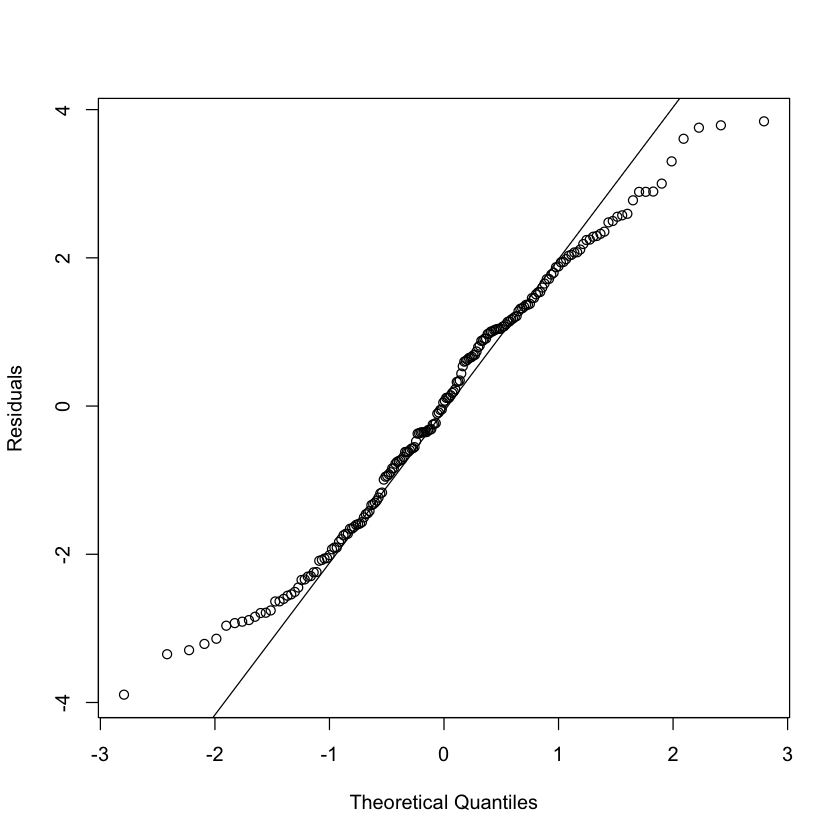

In [222]:
# Use Q-Q plot to check whether the residuals follow a normal distribution.
qqnorm(residuals(m2),ylab="Residuals",main="")
qqline(residuals(m2))
# Almost normal!

#### Other Stuff

In this project, I used several R pakcages to play with the data. I cleaned and filtered the data for visualization, also fit a super simple multiple linear regression model to predict the ranking. Due to the data size limit, the model was not so good at expected (but not so bad as well!)

#### References

(1) Data was retrieved from <i>https://www.kaggle.com/zaeemnalla/premier-league#stats.csv</i>

(2) Linar Models with R (2nd Edition), by Julian J. Faraway

(3) ggplot2, by Hadley Wickham (highly recommended!)

#### Useful links for ideas

(1) https://www.kaggle.com/

(2) http://rpubs.com/

(3) https://www.r-bloggers.com/

(4) https://www.datacamp.com/

(5) https://www.data.gov/